<a href="https://colab.research.google.com/github/x5wang/Projects/blob/master/COGS118b_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 118B Final Project

Member:


1. Yiou Lyu A15930345  
2. Yiyi Xu A15403923
3. Shengjie Mao A15531892
4. Xinkai Wang A15454296

**Method:**



**Research Question:**

## Data Description and Variables

## Hypothesis

## Importing Modules and Defining an Evaluation Table

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures,StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import SpectralClustering, KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
import folium
from folium.plugins import HeatMap
import matplotlib.ticker as ticker
from sklearn.mixture import GaussianMixture as GM
%matplotlib inline

In [ ]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})
evaluation_C = evaluation.copy()

In [ ]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

## Data Import

In [ ]:
raw_data = pd.read_csv('/content/CC GENERAL.csv')
raw_data.shape

(8950, 18)

In [ ]:
raw_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
raw_data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Data Cleaning

In [ ]:
# we drop column tenure because we are not familiar with this concept
raw_data = raw_data.drop('TENURE',axis='columns')

In [ ]:
# How many missing data in this dataset each column
var_missing = raw_data.isna().sum()
var_missing

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
# look at missing value entry on credit limit
c = raw_data[raw_data['CREDIT_LIMIT'].isna()]
c

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0


In [ ]:
# drop this row with missing value entry on credit limit because no information indicate what value it should be
df = raw_data.dropna(subset=['CREDIT_LIMIT'])
df.shape

(8949, 17)

In [ ]:
# look at missing value entry on MINIMUM_PAYMENTS
m = raw_data[raw_data['MINIMUM_PAYMENTS'].isna()]
m.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
3,C10004,1666.670542,0.636364,1499.0,1499.0,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0
45,C10047,2242.311686,1.000000,437.0,97.0,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0
47,C10049,3910.111237,1.000000,0.0,0.0,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0
54,C10056,6.660517,0.636364,310.0,0.0,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0
55,C10057,1311.995984,1.000000,1283.9,1283.9,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0


In [ ]:
# drop these rows with missing value entry on MINIMUM_PAYMENTS because no information indicate what value it should be
df = df.dropna(subset=['MINIMUM_PAYMENTS'])
df.shape

(8636, 17)

In [ ]:
# check if there is any missing value left
df.isna().sum().sum() # so there is no missing value left

0

In [ ]:
# customer id is not useful for our analysis so drop it
df = df.drop('CUST_ID', axis=1)

## Data Visualization (Exploratory Descriptive Analysis)

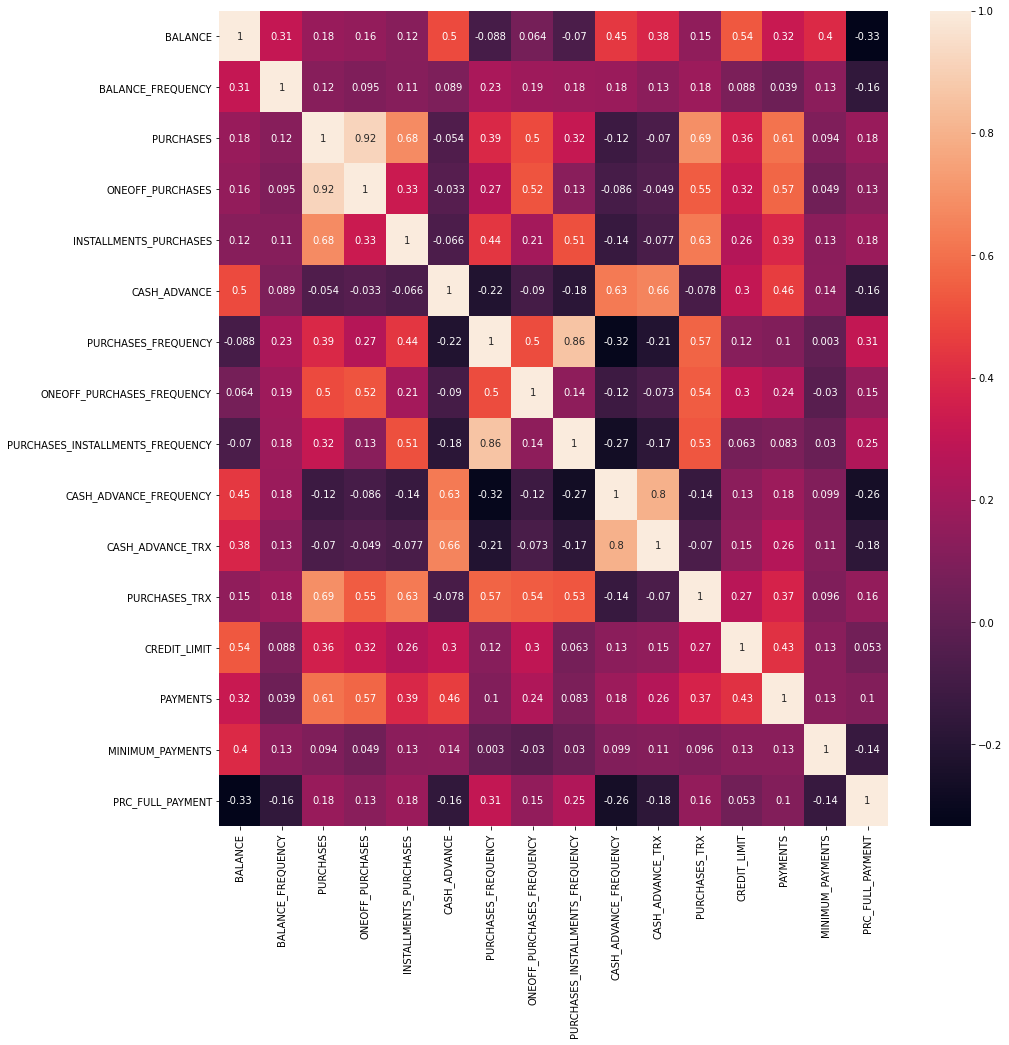

In [ ]:
# correlation
correlation = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(correlation, annot=True)
plt.show()

## Data Preprocessing: 

Normalize Data

In [ ]:
scale_train = StandardScaler().fit_transform(df)
normalize_train = normalize(scale_train)
normalize_train = pd.DataFrame(normalize_train)


Using PCA to reduce Dimensionality

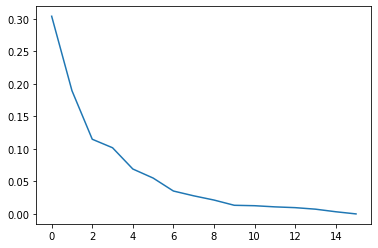

In [ ]:
# explained variance for all 16 principal components
pca = PCA(n_components=16)
pca.fit(normalize_train)
plt.plot(pca.explained_variance_)

In [ ]:
# choose 2 largest principal components
pca2_train = PCA(n_components = 2).fit_transform(normalize_train)
pca2_train = pd.DataFrame(pca2_train)
pca2_train

,0,1
0,-0.479014,-0.690871
1,-0.537057,0.537616
2,0.323641,0.285197
3,-0.561279,-0.497586
4,0.334755,-0.242160
...,...,...
8631,-0.377918,-0.593132
8632,0.562020,-0.497938
8633,0.360219,-0.712217
8634,-0.617521,-0.521598


## Algorithms list: the ones we wrote vs others already in packages

**No. 1 : k - means clustering definition**

In [ ]:
class K_Means(object):
    
    def __init__(self, k=2, tolerance=0.0001, max_iter=300):
        self.k_ = k
        self.tolerance_ = tolerance
        self.max_iter_ = max_iter

    def fit(self, data):
        self.centers_ = {}
        for i in range(self.k_):
            self.centers_[i] = data[i]

        for i in range(self.max_iter_):
            self.clf_ = {}
            self.labels = []
            for i in range(self.k_):
                self.clf_[i] = []
            # print("center:",self.centers_)
            for feature in data:
                # distances = [np.linalg.norm(feature-self.centers[center]) for center in self.centers]
                distances = []
                for center in self.centers_:
                    
                    # np.sqrt(np.sum((features-self.centers_[center])**2))
                    distances.append(np.linalg.norm(feature - self.centers_[center]))
                classification = distances.index(min(distances))
                self.labels.append(classification)
                self.clf_[classification].append(feature)

            # print("classification:",self.clf_)
            prev_centers = dict(self.centers_)
            for c in self.clf_:
                self.centers_[c] = np.average(self.clf_[c], axis=0)

            # centroid error tolerance
            optimized = True
            for center in self.centers_:
                org_centers = prev_centers[center]
                cur_centers = self.centers_[center]
                if np.sum((cur_centers - org_centers) / org_centers * 100.0) > self.tolerance_:
                    optimized = False
            if optimized:
                break

    def predict(self, p_data):
        distances = [np.linalg.norm(p_data - self.centers_[center]) for center in self.centers_]
        index = distances.index(min(distances))
        return index

{0: array([ 0.00570025, -0.36399909]), 1: array([-0.00586905,  0.37477791])}


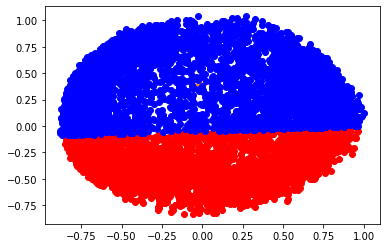

In [ ]:


if __name__ == '__main__':
    x = np.array(pca2_train)
    k_means = K_Means(k=2) # 2 center
    k_means.fit(x) # classfication
    print(k_means.centers_)
    for center in k_means.centers_:
        pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)

    for cat in k_means.clf_:
        for point in k_means.clf_[cat]:
            pyplot.scatter(point[0], point[1], c=('r' if cat == 0 else 'b'))

    #predict = np.array(pca2_train)
    #for feature in predict:
    #    cat = k_means.predict(predict)
    #    pyplot.scatter(feature[0], feature[1], c=('r' if cat == 0 else 'b'), marker='x')

    pyplot.show()

{0: array([-0.3615474 , -0.41719992]), 1: array([-0.55264796,  0.40880455]), 2: array([0.50931555, 0.06042931])}


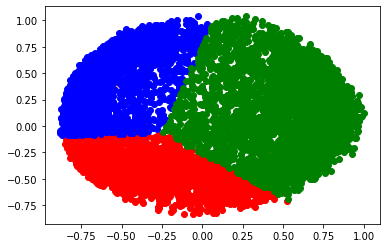

In [ ]:
def color(cat):
  if cat == 0:
    color = 'r'
  elif cat ==1:
    color = 'b'
  elif cat == 2:
    color = 'green'
  elif cat == 3:
    color = 'yellow'
  elif cat == 4:
    color = 'orange'
  return color 

if __name__ == '__main__':
    x = np.array(pca2_train)
    k_means = K_Means(k=3) # 3 center
    k_means.fit(x) # classfication
    print(k_means.centers_)
    for center in k_means.centers_:
        pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)

    for cat in k_means.clf_:
        for point in k_means.clf_[cat]:
            pyplot.scatter(point[0], point[1], c=color(cat))

    #predict = np.array(pca2_train)
    #for feature in predict:
    #    cat = k_means.predict(predict)
    #    pyplot.scatter(feature[0], feature[1], c=color(cat), marker='x')

    pyplot.show()

{0: array([-0.19114555, -0.43720191]), 1: array([-0.3863919 ,  0.61041219]), 2: array([0.5679365 , 0.36497325]), 3: array([-0.69299663, -0.10745025]), 4: array([ 0.548676  , -0.28680368])}


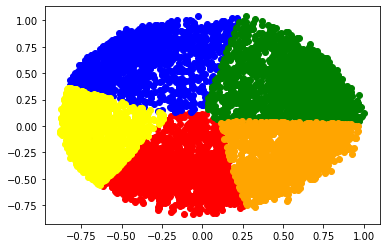

In [ ]:
def color(cat):
  if cat == 0:
    color = 'r'
  elif cat ==1:
    color = 'b'
  elif cat == 2:
    color = 'green'
  elif cat == 3:
    color = 'yellow'
  elif cat == 4:
    color = 'orange'
  return color 
  
if __name__ == '__main__':
    x = np.array(pca2_train)
    k_means = K_Means(k=5) # 5 center
    k_means.fit(x) # classfication
    print(k_means.centers_)
    for center in k_means.centers_:
        pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)

    for cat in k_means.clf_:
        for point in k_means.clf_[cat]:
        
            pyplot.scatter(point[0], point[1], c=color(cat))

    #predict = np.array(pca2_train)
    #for feature in predict:
    #    cat = k_means.predict(predict)
    #    pyplot.scatter(feature[0], feature[1], c=color(cat), marker='x')

    pyplot.show()

**No. 2: Spectral Clustering**

number of clusters = 2, using rbf

In [ ]:
SCClustering_rbf = SpectralClustering(n_clusters = 2,affinity='rbf',random_state=0).fit(normalize_train)
SClabels_rbf = SCClustering_rbf.labels_

In [ ]:
SCClusters_rbf=pd.concat([df,pd.DataFrame({'cluster':SClabels_rbf})],axis=1)

In [ ]:
SCClusters_rbf.loc[SCClusters_rbf['cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,0.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8627,342.361553,1.000000,258.50,83.48,175.02,225.819508,0.666667,0.166667,0.500000,0.083333,3.0,10.0,1000.0,686.449219,282.368125,0.083333,0.0
8629,115.611030,1.000000,379.32,0.00,379.32,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,281.152056,179.901711,0.000000,0.0
8631,553.901465,1.000000,458.76,0.00,458.76,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,157.770746,257.530999,0.000000,0.0
8634,683.188651,1.000000,85.00,85.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,3000.0,447.237766,214.535254,0.000000,0.0


In [ ]:
SCClusters_rbf.loc[SCClusters_rbf['cluster'] == 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000,1.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000,1.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000,1.0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8624,1012.089680,1.000000,312.48,0.00,312.48,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,325.606238,607.957480,0.000,1.0
8628,79.038910,0.363636,750.00,0.00,750.00,0.000000,0.250000,0.000000,0.250000,0.000000,0.0,3.0,1300.0,2445.816802,177.312850,1.000,1.0
8630,221.291290,1.000000,1429.54,653.82,775.72,0.000000,0.916667,0.500000,0.666667,0.000000,0.0,24.0,700.0,1277.898622,149.825296,0.375,1.0
8632,70.162707,0.636364,599.00,0.00,599.00,0.000000,0.500000,0.000000,0.416667,0.000000,0.0,6.0,1000.0,1007.348156,139.860070,1.000,1.0


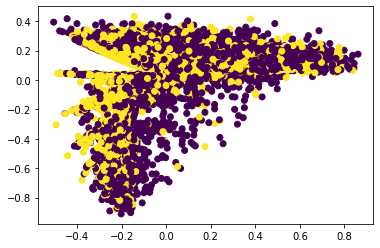

In [ ]:
plt.scatter(normalize_train[0], normalize_train[1],  
           c = SpectralClustering(n_clusters = 2,affinity='rbf',random_state=0) .fit_predict(normalize_train)) 
plt.show() 

number of clusters = 2, using nearest_neighbors

In [ ]:
SCClustering_nn = SpectralClustering(n_clusters = 2,affinity='nearest_neighbors',random_state=0).fit(normalize_train)
SClabels_nn = SCClustering_nn.labels_
SCClusters_nn=pd.concat([df,pd.DataFrame({'cluster':SClabels_nn})],axis=1)

In [ ]:
SCClusters_nn.loc[SCClusters_nn['cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000,0.0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000,0.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,79.038910,0.363636,750.00,0.00,750.00,0.000000,0.250000,0.000000,0.250000,0.000000,0.0,3.0,1300.0,2445.816802,177.312850,1.000,0.0
8630,221.291290,1.000000,1429.54,653.82,775.72,0.000000,0.916667,0.500000,0.666667,0.000000,0.0,24.0,700.0,1277.898622,149.825296,0.375,0.0
8631,553.901465,1.000000,458.76,0.00,458.76,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,157.770746,257.530999,0.000,0.0
8632,70.162707,0.636364,599.00,0.00,599.00,0.000000,0.500000,0.000000,0.416667,0.000000,0.0,6.0,1000.0,1007.348156,139.860070,1.000,0.0


In [ ]:
SCClusters_nn.loc[SCClusters_nn['cluster'] == 1]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,1.0
13,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,0.000000,0.0,26.0,7500.0,1655.891435,251.137986,0.083333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8626,1528.122917,1.000000,0.00,0.00,0.00,2426.656054,0.000000,0.000000,0.000000,0.500000,19.0,0.0,3500.0,2039.574349,314.465218,0.000000,1.0
8627,342.361553,1.000000,258.50,83.48,175.02,225.819508,0.666667,0.166667,0.500000,0.083333,3.0,10.0,1000.0,686.449219,282.368125,0.083333,1.0
8629,115.611030,1.000000,379.32,0.00,379.32,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,281.152056,179.901711,0.000000,1.0
8634,683.188651,1.000000,85.00,85.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,3000.0,447.237766,214.535254,0.000000,1.0


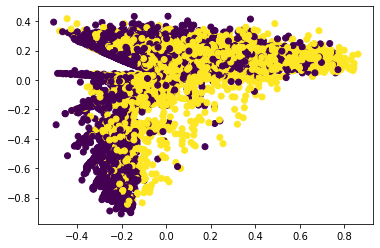

In [ ]:
plt.scatter(normalize_train[0], normalize_train[1],  
           c = SpectralClustering(n_clusters = 2,affinity='nearest_neighbors',random_state=0).fit_predict(normalize_train)) 
plt.show()

**No. 3: Gaussian Mixture model**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

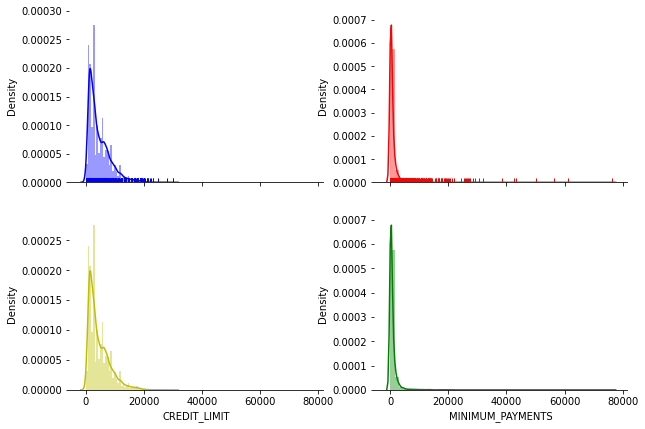

In [ ]:
# Visualizing data with missing value removed:
f, axes = plt.subplots(2, 2, figsize=(10, 7), sharex=True);
sns.despine(left=True);
# kernel density estimation and rug plot
sns.distplot(df['MINIMUM_PAYMENTS'], hist=True, rug=True, color="r", ax=axes[0, 1]);
sns.distplot(df['CREDIT_LIMIT'], hist=True, rug=True, color="b", ax=axes[0, 0]);
# null value deleted estimation plot
sns.distplot(df['MINIMUM_PAYMENTS'],  color="g",ax=axes[1, 1]);
sns.distplot(df['CREDIT_LIMIT'], color="y", ax=axes[1, 0]);

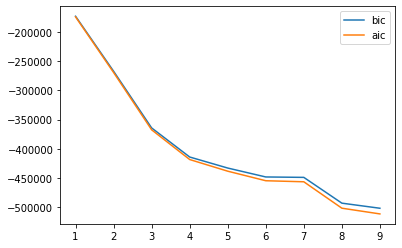

In [ ]:
# Finding the number of clusters:
model = [GM(i,random_state=0).fit(normalize_train) for i in range(1,10)]
gr = pd.DataFrame({'bic':[j.bic(normalize_train) for j in model],
                  'aic': [j.aic(normalize_train) for j in model]},index=np.arange(1,10))
gr.plot(use_index=True)

choose K=3 as the numb of cluster

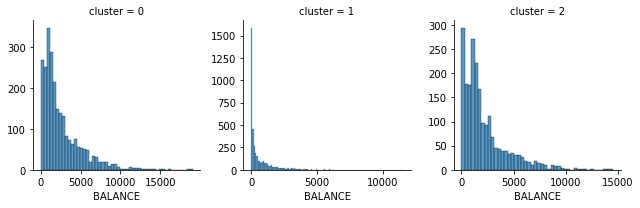

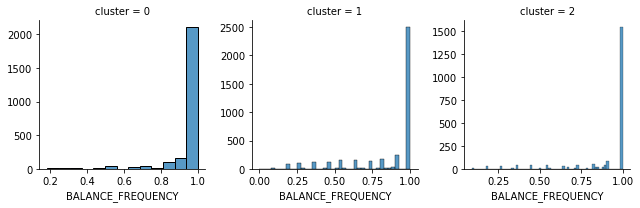

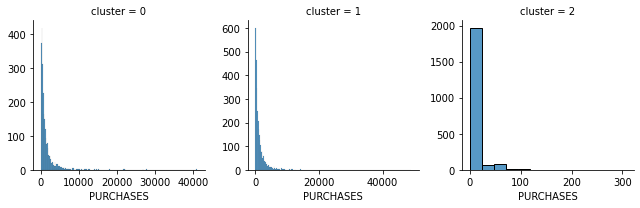

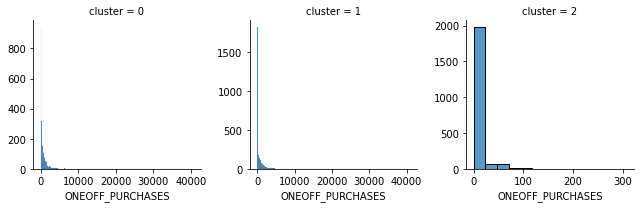

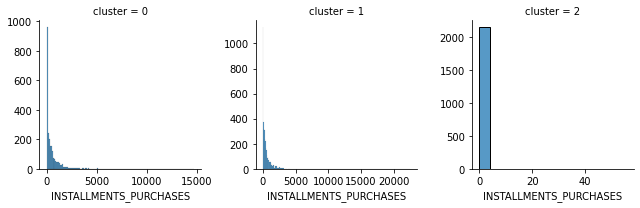

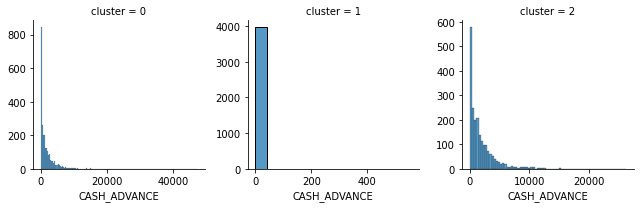

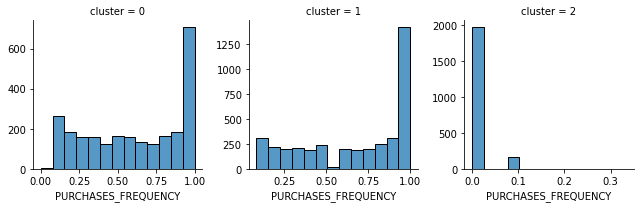

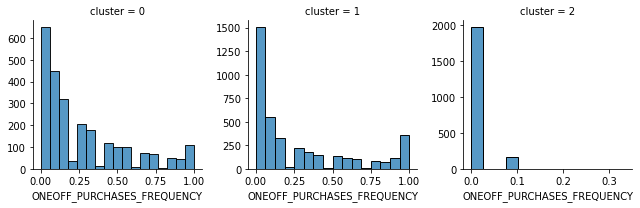

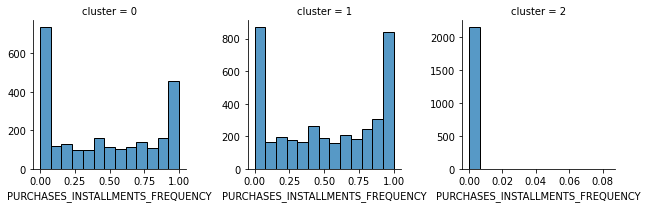

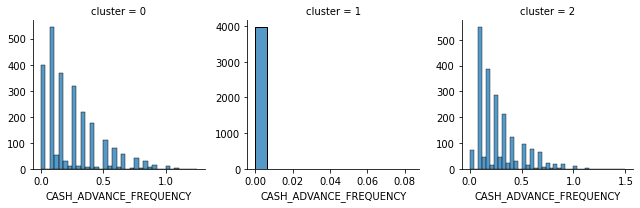

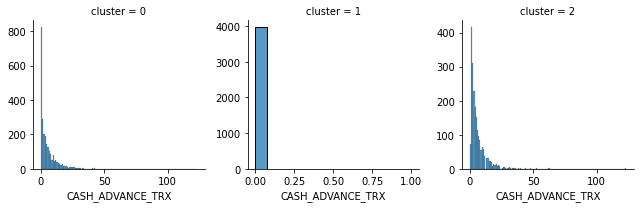

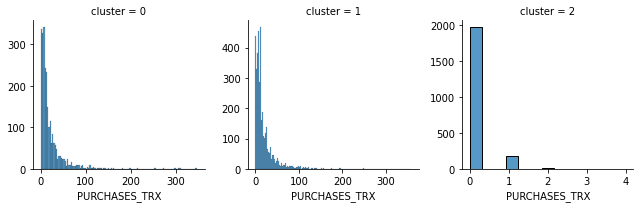

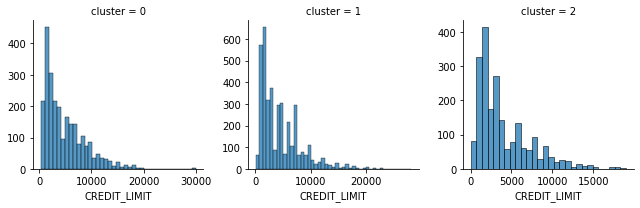

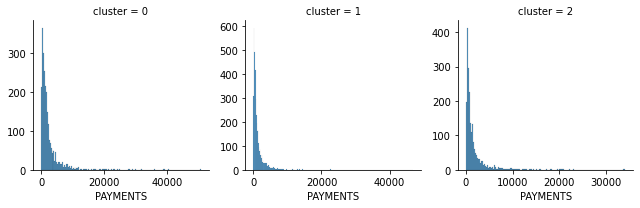

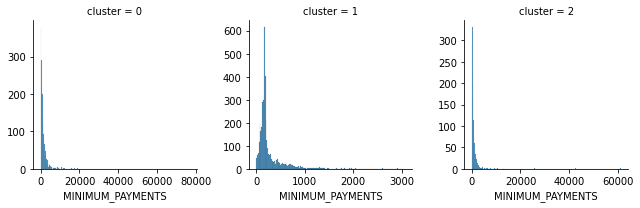

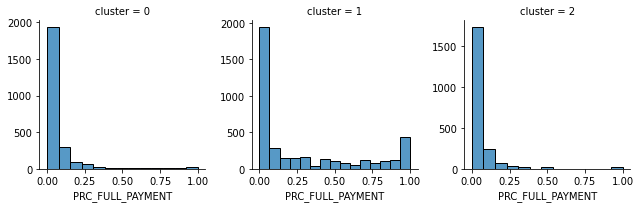

In [ ]:
# Visualization using Gaussian Mixture model
mod = GM(n_components = 3, n_init = 10, max_iter = 100)
cluster = mod.fit_predict(normalize_train)
dff = df.copy()
dff['cluster'] = cluster
# three clusters' data individually
for i in dff:
    if i != 'cluster':
        g = sns.FacetGrid(dff, col = 'cluster',sharex=False,sharey=False)
        p = g.map(sns.histplot, i,kde_kws = {'bw':2})
plt.show()

In [ ]:
# Numerical information
for i in range(3):
    display(dff[dff.cluster == i].describe())

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
count,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.0
mean,2577.308812,0.958525,1311.507591,771.431491,541.088809,1734.461625,0.618982,0.266997,0.452872,0.240571,5.892009,19.925237,4910.198224,2484.475707,1657.575320,0.061663,0.0
std,2517.367811,0.117088,2130.360303,1724.080023,1002.123228,2685.209221,0.333956,0.287227,0.391020,0.217256,8.111596,27.377795,3909.313658,3671.929537,3459.793279,0.167215,0.0
min,1.097736,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,18.496532,3.197940,0.000000,0.0
25%,898.385358,1.000000,284.702500,0.000000,0.000000,157.181560,0.333333,0.000000,0.000000,0.083333,1.000000,5.000000,1800.000000,672.473301,370.982701,0.000000,0.0
50%,1696.230029,1.000000,663.020000,262.250000,225.950000,892.201154,0.666667,0.166667,0.416667,0.166667,3.000000,12.000000,3725.000000,1398.427798,857.613692,0.000000,0.0
75%,3517.216573,1.000000,1520.680000,872.335000,666.040000,2307.910276,1.000000,0.416667,0.833333,0.333333,8.000000,24.000000,7000.000000,2751.453021,1674.568994,0.000000,0.0
max,19043.138560,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.250000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,0.0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
count,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.000000,3962.0
mean,667.092054,0.854123,1395.681901,823.660134,572.053695,0.140880,0.681949,0.274243,0.514939,0.000021,0.000252,20.003786,4534.307372,1393.751482,279.109587,0.283921,1.0
std,1180.280943,0.239051,2566.879892,2006.807571,1032.181427,8.867615,0.325764,0.339004,0.385215,0.001324,0.015887,27.259739,3651.909242,2329.633878,315.314273,0.366701,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.019163,0.000000,1.0
25%,43.108940,0.800000,266.530000,0.000000,50.000000,0.000000,0.416667,0.000000,0.083333,0.000000,0.000000,6.000000,1600.000000,338.532555,134.865249,0.000000,1.0
50%,175.752206,1.000000,633.475000,175.000000,275.960000,0.000000,0.777778,0.083333,0.500000,0.000000,0.000000,12.000000,3300.000000,711.165929,176.966918,0.083333,1.0
75%,827.012195,1.000000,1559.165000,912.555000,668.817500,0.000000,1.000000,0.500000,0.916667,0.000000,0.000000,24.000000,6500.000000,1569.845156,276.529699,0.545455,1.0
max,11547.520010,1.000000,49039.570000,40761.250000,22500.000000,558.166886,1.000000,1.000000,1.000000,0.083333,1.000000,358.000000,28000.000000,46930.598240,3068.125648,1.000000,1.0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
count,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.000000,2146.0
mean,2176.012478,0.895777,4.876076,4.850214,0.025862,1957.326496,0.007824,0.007785,0.000039,0.270318,6.394688,0.093663,4042.344460,1681.246462,1010.230613,0.044253,2.0
std,2138.910811,0.210092,18.584987,18.553096,1.198059,2494.811323,0.027088,0.027040,0.001799,0.207927,8.788016,0.327578,3296.009683,2703.466344,2641.896816,0.137618,0.0
min,0.001146,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.117036,0.000000,2.0
25%,785.076871,0.909091,0.000000,0.000000,0.000000,309.672574,0.000000,0.000000,0.000000,0.083333,2.000000,0.000000,1500.000000,376.860865,258.701335,0.000000,2.0
50%,1468.319962,1.000000,0.000000,0.000000,0.000000,1158.515655,0.000000,0.000000,0.000000,0.250000,4.000000,0.000000,3000.000000,775.036490,481.167954,0.000000,2.0
75%,2841.876341,1.000000,0.000000,0.000000,0.000000,2673.666226,0.000000,0.000000,0.000000,0.333333,8.000000,0.000000,6000.000000,1744.608149,999.917337,0.000000,2.0
max,14581.459140,1.000000,306.910000,306.910000,55.500000,26194.049540,0.333333,0.333333,0.083333,1.500000,123.000000,4.000000,19000.000000,34107.074990,61031.618600,1.000000,2.0


**Use the data with reduced dimension by PCA for the three algorithms:**

In [ ]:
kmeans2 = K_Means(k = 2)
kmeans2.fit(np.array(pca2_train))
kmeans3 = K_Means(k = 3)
kmeans3.fit(np.array(pca2_train))
kmeans5 = K_Means(k = 5)
kmeans5.fit(np.array(pca2_train))

spectral_rbf = SpectralClustering(n_clusters=2, affinity='rbf', random_state=0).fit(normalize_train)
spectral_nn = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0).fit(normalize_train)
spectral_rbf_pca = SpectralClustering(n_clusters=3, affinity='rbf', random_state=0).fit(pca2_train)
spectral_nn_pca = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=0).fit(pca2_train)
gm_clusters = GM(n_components=3, random_state=0).fit_predict(pca2_train)

## Algorithms performance and evaluation table

In [ ]:
metrics.silhouette_score(normalize_train, spectral_rbf.labels_)

0.24410696916497893

In [ ]:
metrics.silhouette_score(normalize_train, spectral_nn.labels_)

0.22142629371190284

In [ ]:
metrics.silhouette_score(normalize_train, cluster)

0.09640050064207985

In [ ]:
metrics.silhouette_score(normalize_train, kmeans2.labels)

0.14979764335904558

In [ ]:
metrics.silhouette_score(normalize_train, kmeans3.labels)

0.19625002332942765

In [ ]:
metrics.silhouette_score(normalize_train, kmeans5.labels)

0.17026015520548754

In [ ]:
metrics.silhouette_score(normalize_train, spectral_rbf_pca.labels_)

0.2224080976850469

In [ ]:
metrics.silhouette_score(normalize_train, spectral_nn_pca.labels_)

0.21149412388019723

In [ ]:
metrics.silhouette_score(normalize_train, gm_clusters)

0.22142352065149057

In [ ]:
metrics.silhouette_score(pca2_train, kmeans2.labels)

0.2963131912666344

In [ ]:
metrics.silhouette_score(pca2_train, kmeans3.labels)

0.43027762399367586

In [ ]:
metrics.silhouette_score(pca2_train, kmeans5.labels)

0.41704271335413123

In [ ]:
metrics.silhouette_score(pca2_train, spectral_rbf_pca.labels_)

0.4592897950984151

In [ ]:
metrics.silhouette_score(pca2_train, spectral_nn_pca.labels_)

0.44308729404784913

In [ ]:
metrics.silhouette_score(pca2_train, gm_clusters)

0.4623363946806928

## Conclusion